<a href="https://colab.research.google.com/github/Saketkr06/Machine-learning-projects/blob/main/Sentiment_Analysis_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [7]:
df=pd.read_csv('/content/raw.githubusercontent.com_mohamedezzeldeenhassanmohamed_NLP-Projects-Repository_main_Sentiment Analysis - Dow Jones (DJIA) Stock using News Headlines_Stock Headlines.csv',encoding='ISO-8859-1')

In [8]:
df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

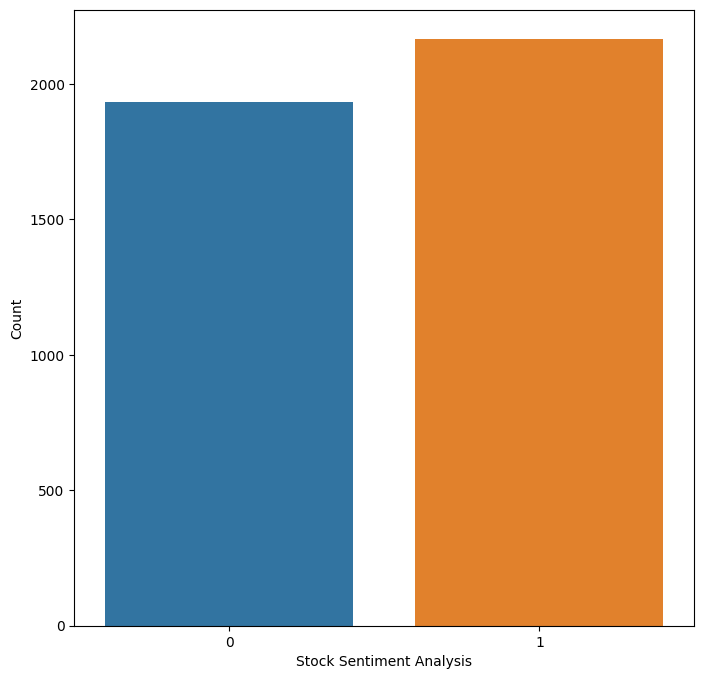

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(x='Label',data=df)
plt.xlabel('Stock Sentiment Analysis')
plt.ylabel('Count')
plt.show()

In [11]:
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df1=df.copy()

In [14]:
df1.reset_index(inplace=True)

In [15]:
train=df1[df1['Date']<'20150101']
test=df1[df1['Date']>'20141231']

In [16]:
y_train=train['Label']
train=train.iloc[:,3:28]
y_test=test['Label']
test=test.iloc[:,3:28]

In [17]:
import nltk

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [20]:
train.replace(to_replace='[^a-zA-Z]',value=' ',regex=True,inplace=True)
test.replace(to_replace='[^a-zA-Z]',value=' ',regex=True,inplace=True)

In [21]:
new_columns=[str(i) for i in range(0,25)]
train.columns=new_columns
test.columns=new_columns

In [22]:
for i in new_columns:
  train[i]=train[i].str.lower()
  test[i]=test[i].str.lower()

In [23]:
train_headlines=[]
test_headlines=[]

for row in range(0,train.shape[0]):
  train_headlines.append(' '.join(str(x) for x in train.iloc[row, 0:25]))
for row in range(0,test.shape[0]):
  test_headlines.append(' '.join(str(x) for x in test.iloc[row, 0:25]))

In [24]:
train_headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [25]:
ps=PorterStemmer()
train_corpus=[]

for i in range(0,len(train_headlines)):
  #tokenizing
  words=train_headlines[i].split()
  #removing stopwords
  words=[word for word in words if word not in set(stopwords.words('english'))]

  #stemming
  words=[ps.stem(word) for word in words]

  headline=' '.join(words)

  train_corpus.append(headline)


In [26]:
# Creating corpus of test dataset
test_corpus = []

for i in range(0, len(test_headlines)):

  # Tokenizing the news-title by words
  words = test_headlines[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  test_corpus.append(headline)

In [27]:
down_words=[]
for i in list(y_train[y_train==0].index):
  down_words.append(train_corpus[i])

up_words=[]
for i in list(y_train[y_train==1].index):
  up_words.append(train_corpus[i])

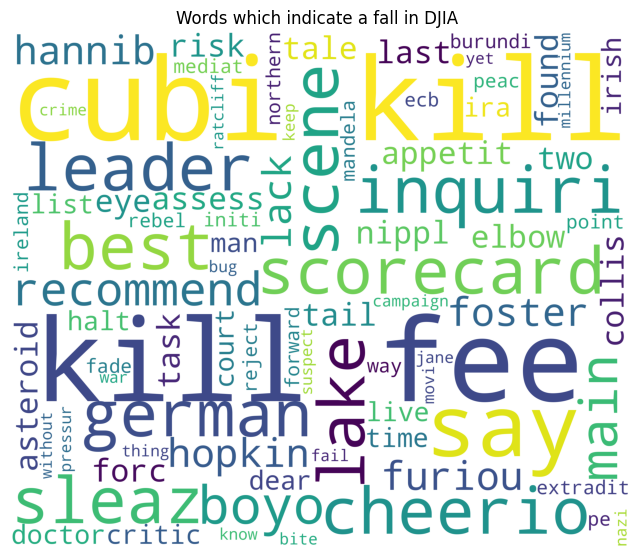

In [28]:
# Creating wordcloud for down_words
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a fall in DJIA ")
plt.show()

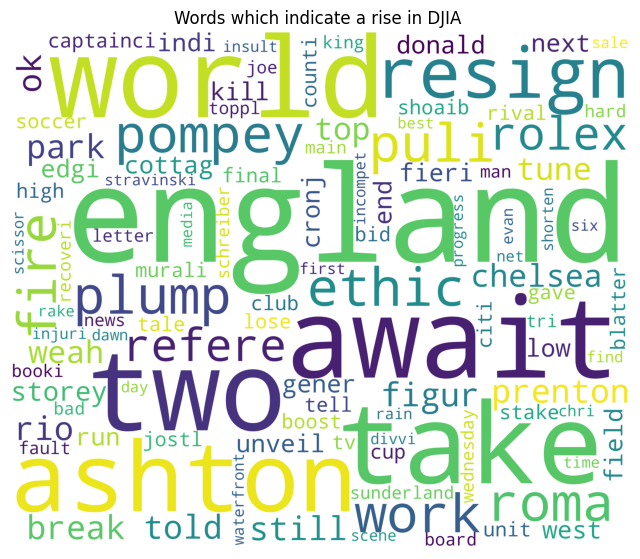

In [29]:
# Creating wordcloud for up_words
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(up_words[5])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate a rise in DJIA ")
plt.show()

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
from pandas.io.parsers.python_parser import count_empty_vals
cv=CountVectorizer(max_features=10000,ngram_range=(2,2))
X_train=cv.fit_transform(train_corpus).toarray()

In [32]:
X_test=cv.transform(test_corpus).toarray()

In [33]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [34]:
lr_y_pred = lr_classifier.predict(X_test)

In [35]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 85.98%
Precision score is: 0.87
Recall score is: 0.85


In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [37]:
lr_cm

array([[162,  24],
       [ 29, 163]])

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [39]:
rf_y_pred = rf_classifier.predict(X_test)

In [40]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 85.19%
Precision score is: 0.84
Recall score is: 0.88


In [41]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [42]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [43]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 83.86%
Precision score is: 0.85
Recall score is: 0.83


Predictions

In [44]:
import re

def stock_prediction(sample_news):
  sample_news=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sample_news)
  sample_news=sample_news.lower()
  sample_news_words=sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return lr_classifier.predict(temp)

In [45]:
# For generating random integer
from random import randint

In [47]:
sample_test = df1[df1['Date'] > '20141231']

In [48]:
sample_test.reset_index(inplace=True)
sample_test = sample_test['Top1']

In [49]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Stephen Hawking announces $100 million hunt for alien life
Prediction: The stock price will remain the same or will go down.
